### Ecole Polytechnique, 2022-2023, MAP361P

Contact: arvind.singh@polythechique.edu

# TP d'introduction à Python

## Rappel sur l'utilisation d'un notebook Jupyter

**Important:** Un notebook est composé de cellules de texte (Markdown/Latex) et de code qui peuvent être exécutées. L'interpréteur Python conserve son état (l'ensembles des variables du programme) entre les cellules. Les numéros à gauche des cellules indiquent l'ordre de dernière exécution. Un des gros avantages des notebooks est donc la possibilité d'exécuter les cellules dans l'ordre de son choix, on peut donc par exemple "remonter" pour modifier du code etc... 


**Toutefois, tout notebook rendu doit pouvoir s'exécuter linéairement, une cellule après l'autre. Avant de transmettre votre fichier notebook, vous devriez donc effectuer les opérations suivantes:**

1. **rédemarrer le noyau (aller dans [Kernel] -> [Restart and clear output])**
2. **puis réexécuter toutes les cellules les unes après les autres (en surveillant que tout fonctionne correctement).**
3. **enfin sauver le notebook exécuté et transmettre le fichier .ipynb au destinataire.** 

**De cette manière, vous êtes sûr que votre notebook sera bien lisible par le correcteur.**





Quelques raccourcis utiles à connaitre pour naviguer dans un notebook: 
    
* `[ENTREE]` entre dans une cellule (passe en mode édition)
* `[ESC]` sort d'une cellule (passe en mode commande)
* `[MAJ]+[ENTREE]` exécute la cellule et passe à la suivante
* `[ALT]+[ENTREE]` exécute la cellule et insère une nouvelle cellule dessous
* `[CTRL]+[ENTREE]` exécute les cellules selectionnées

Les commandes suivantes sont disponibles en mode 'commande' uniquement:

* `M` change une cellule en markdown
* `Y` change une cellule en code


* `A` insère une cellule au dessus de la sélection
* `B` insère une cellule au dessous de la sélection
* `D+D` supprime la cellule sélectionnée
* `Z` annule la suppression
* `[MAJ]+M` fusionne les cellules sélectionnées
* `C` `V` `X` copy paste des cellules

IPython définit un certain nombre de [commandes magiques](https://ipython.readthedocs.io/en/stable/interactive/magics.html) utiles. En particulier `%matplotlib inline` pour afficher les graphiques dans le notebook. 

In [1]:
# un cellule de code s'execute en la selectionnant puis en tapant [CTRL]+[ENTREE]
%matplotlib inline

La commande magique suivante permet de résoudre certains bugs avec l'auto-complétion dans les notebooks.

In [2]:
# décommenter la ligne ci-dessous en cas de problème d'auto-complétion (inutile sur le JupyterHub de Polytechnique)
# %config Completer.use_jedi = False

## A l'aide !

Il est possible d'obtenir de l'aide / la documentation des méthodes à l'intérieur même d'un notebook:

* Autocomplétion à l'aide de la touche `TAB` : permet de voir les méthodes disponibles. 
* Affichage de la documentation (docstring) d'une fonction à l'aide de `[MAJ] + [TAB] (+ [TAB] + [TAB] + [TAB])` 
* Alternativement, `?object` ou `object?` affiche aussi la documentation associée à `object`.

Ne pas hésiter à aller consulter la documentation officielle pour comprendre comment utiliser une méthode:

* [documentation du package NumPy](https://numpy.org/doc/stable/reference/index.html)
* [documentation du package MatPlotLib](https://matplotlib.org/stable/index.html)
* [documentation du package SciPy Stats](https://docs.scipy.org/doc/scipy/reference/stats.html)

**Si votre programme plante** : Si la cellule exécutée semble ne jamais se terminer (le symbole [\*] persiste à gauche de la cellule). Vous pouvez:

1. Essayer **[Kernel] -> [Interrupt]** pour interrompre le calcul en cours.

2. Si cela ne marche pas, aller dans le menu **[Kernel] -> [Restart (and clear output)]**. L'interpréteur Python est remis à son état initial. Toutes les variables définies précédements sont effacées. Il faut donc re-exécuter toutes les cellules à nouveau. 

***
## 1. Echauffement

La première chose à faire dans un notebook consiste toujours à importer les bibliothèques standards. Pour nous, cela sera: 

- `numpy` pour les opérations vectorielles
- `matplotlib.pyplot` pour tracer les graphiques
- `scipy.stats` et `numpy.random` pour la génération et l'étude statistique des variables aléatoires. 

In [3]:
# importe les bibliothèques dont on aura besoin
# on utilise les alias canoniques
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr
import scipy.stats as sps


### La suite de Syracuse

La fameuse suite de Syracuse est définie par la relation de recurence: $u_0 \in \mathbb{N}^*$ et  
$$
u_{n+1} = 
\begin{cases}
\frac{u_n}{2} & \hbox{si $u_n$ est divisible par $2$} \\
3 u_n + 1 & \hbox{sinon}
\end{cases}
$$

La conjecture de Collatz (toujours ouverte) stipule que, pour toute valeur $u_0$, la suite finit par atteindre $1$ (puis cycle sur $1$, $4$, $2$, $1$, $4$, $2$, ...). 

**(a)** Ecrire une fonction python qui prend comme entrée la valeur initiale $u_0$ de la suite de Syracuse et renvoie une liste Python contenant toutes les valeurs de la suite [$u_0$, $u_1$, ...] jusqu'à atteindre la valeur $1$ (incluse). 

On pourra utiliser une boucle `while` et la méthode `append` pour ajouter un élément à la fin d'une liste.

In [4]:
def Syracuse(u):
    # ci-dessous est la docstring de la fonction qui la documente (pour l'aide avec [tab] par exemple). 
    """     
    Cette fonction renvoie la liste des valeurs de la suite de Syracuse 
    issue de u jusqu'à atteindre 1 (inclus). 
    """
    suite = [u]
    while u !=1:
        if u % 2 == 0:
            u = u//2 # attention, on veux rester dans les entiers !
        else:
            u = 3*u + 1
        suite.append(u)
    return suite

**(b)** Afficher les suites obtenues pour $u_0$ variant entre 1 et 10 pour vérifier votre programme

In [5]:
for i in range(1,11):
    print(f"Suite partant de u_0 = {i} : ", Syracuse(i))

Suite partant de u_0 = 1 :  [1]
Suite partant de u_0 = 2 :  [2, 1]
Suite partant de u_0 = 3 :  [3, 10, 5, 16, 8, 4, 2, 1]
Suite partant de u_0 = 4 :  [4, 2, 1]
Suite partant de u_0 = 5 :  [5, 16, 8, 4, 2, 1]
Suite partant de u_0 = 6 :  [6, 3, 10, 5, 16, 8, 4, 2, 1]
Suite partant de u_0 = 7 :  [7, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]
Suite partant de u_0 = 8 :  [8, 4, 2, 1]
Suite partant de u_0 = 9 :  [9, 28, 14, 7, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]
Suite partant de u_0 = 10 :  [10, 5, 16, 8, 4, 2, 1]


Exécutez la cellule ci-dessous. Modifiez eventuellement votre code précédent pour obtenir les félicitations du programme.

**Rappel** : les entiers en Python ont une précision arbitraire mais pas les flottants ni les entiers Numpy.

In [6]:
if len(Syracuse(80867137596217)) == 1663:
    print("Bravo!") 
else:
    print("Attention à la différence entre / et // ...")

Bravo!


**(c)** Ecrire une fonction qui utilise la librairie `matplotlib` pour afficher le graphique de $u_n$ en fonction de $n$. On utilisera la méthode `plt.plot()` pour afficher la suite et `plt.title()` pour mettre un titre au graphique qui indique le point de départ et la longueur de la suite.   

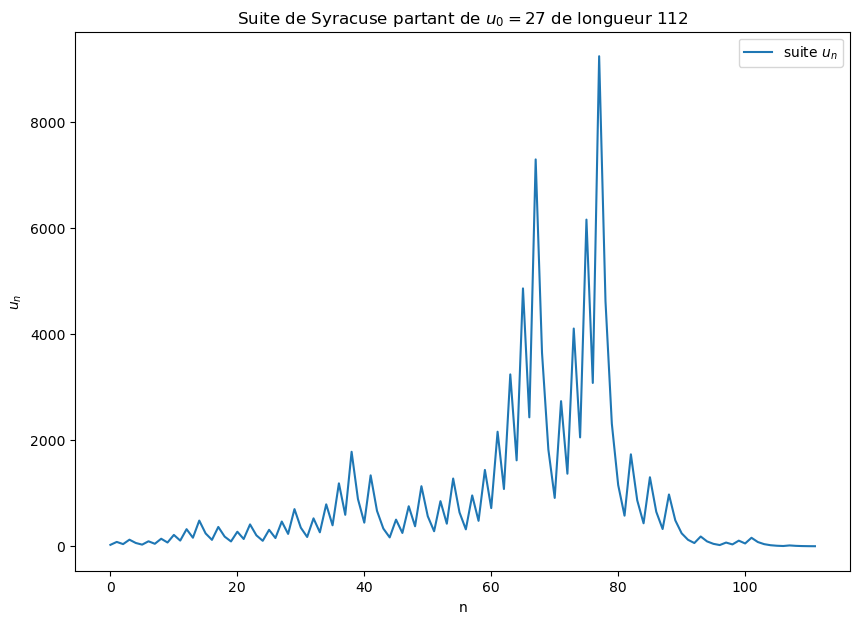

In [7]:
def afficheSyracuse(u0):
    U = Syracuse(u0) # calcule la suite des valeurs jusqu'à obtenir 1
    X = np.arange(len(U)) # tableau (numpy) qui contient [0,1,2, ..., len(U)-1]

    # on choisit une figure pas trop petite
    plt.figure(figsize=(10,7))

    plt.plot(X, U, label="suite $u_n$") # affiche u_n en fonction de n
    
    # ce qui suit est décoratif
    plt.title(f"Suite de Syracuse partant de $u_0=${u0} de longueur {len(U)}")
    plt.legend(loc="best") # met la legende la ou cela ne gêne pas
    plt.xlabel("n") 
    plt.ylabel("$u_n$")
    
    # finalement on affiche le graphique dans le notebook
    plt.show() 
    
# testons pour u_0 = 27
afficheSyracuse(27)

**(d)** Créer une liste appelée `tab_max` de taille `N = 10000` dont la i-ième entrée contient la valeur maximum prise par la suite de Syracuse partant de i+1. Afficher le graphique de `tab_max` en utilisant la fonction `plt.scatter()`     

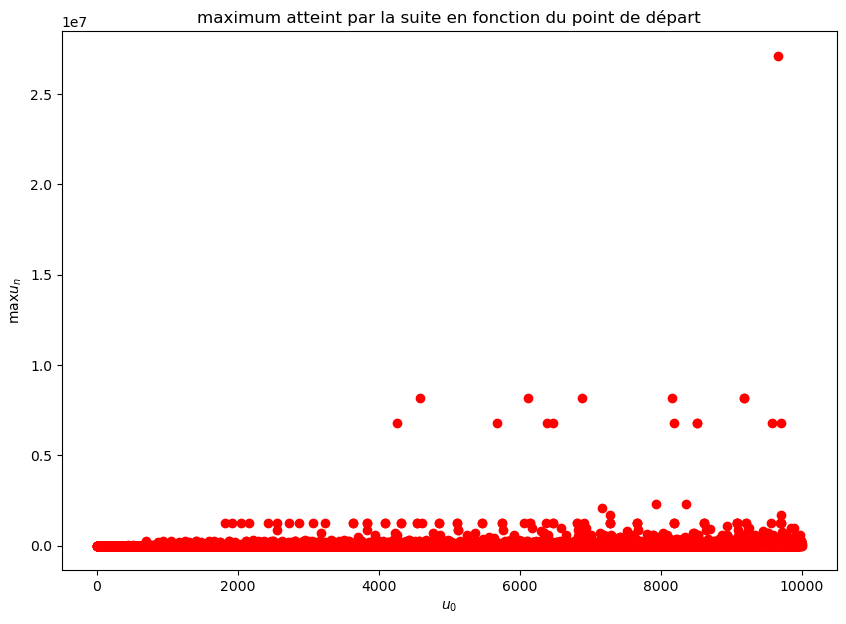

In [8]:
N = 10000

# on peut utiliser une 'compréhension de liste' pour un code concis...
tab_max = [ max(Syracuse(u)) for u in range(1, N+1) ]

# on affiche le graphique max(U_n) en fonction de u_0
plt.figure(figsize=(10,7))
plt.scatter(np.arange(1,N+1), tab_max, color="red") # affiche u_n en fonction de n
plt.title(f"maximum atteint par la suite en fonction du point de départ")
plt.xlabel("$u_0$") 
plt.ylabel("$\max u_n$")
plt.show()

**(e)**  Pour quelle valeur initiale $u_0 \in [1,10000]$ la suite de Syracuse atteint-elle sa valeur maximum. On pourra regarder la documentation de la fonction numpy `np.argmax()`. 

In [9]:
indice_max = np.argmax(tab_max) + 1

print("Le maximum est atteint partant de u_0 = ", indice_max) # penser au +1 ...

Le maximum est atteint partant de u_0 =  9663


**(f)** Combien de valeurs différentes sont présentes dans `tab_max` ? On pourra utiliser `np.unique` ou se rappeler qu'un `set` en Python ne contient pas de doublons...

In [10]:
print("tab_max contient", len(set(tab_max)), "valeurs differentes.") # avec un set...
print("tab_max contient", len(np.unique(tab_max)), "valeurs differentes.") # ... ou en utilisant np.unique


tab_max contient 2663 valeurs differentes.
tab_max contient 2663 valeurs differentes.


**Remarque:** Pour stocker les valeurs de la suite de Syracuse, il était utile ici d'utiliser une **liste python** `[]` car on ne connait pas, a priori, le nombre de termes de la suite et l'on est donc amené à la faire grandir au fur et à mesure. **Lorsque l'on a besoin de créer un tableau de nombres *dont la taille est fixe*, il est en général beaucoup plus efficace d'utiliser un tableau numpy de type `ndarray`** C'est ce que l'on fera dans la suite...

***
## 2. Simulation de lois discretes. 

Pour simuler des variables aléatoires, on peut utiliser le sous module `numpy.random` (alias `npr`) pour les lois les plus classiques ou bien encore `scipy.stats`  (alias `sps`) qui contient davantage de lois et permet, en plus d'obtenir les statistiques associées à ces distributions. 

### Lois à support fini.

**(a)** Utiliser la méthode `npr.choice()` pour simuler un échantillon de taille $N = 500$ de variables aléatoires de loi $X$, de support $\{1,2,3,4,5\}$ avec 
$$\mathbb{P}(X = 1) = 0.08 , \,\,\mathbb{P}(X = 2) = \mathbb{P}(X = 3) = 0.25, \,\, \mathbb{P}(X = 4) = 0.4, \,\, \mathbb{P}(X=5) = 0.02$$

In [11]:
N = 500
espace_etat = [1,2,3,4,5] # ou bien np.arange(1,6)
probas = [0.08,0.25,0.25,0.4,0.02]   
echantillon = npr.choice(espace_etat, p=probas, size=N)

**(b)** Afficher sur un même graphique l'histogramme de la loi empirique de l'échantillon précédent. On representera sur le même graphique la loi théorique pour comparaison.  

*Indications:*
- On utilisera la méthode `np.bincount()` pour trier l'échantillon par valeurs.
- On utilisera la méthode `plt.stem()` pour tracer la loi théorique 
- On utilisera la méthode `plt.bar()` pour tracer l'histogramme de la loi de l'échantillon. 

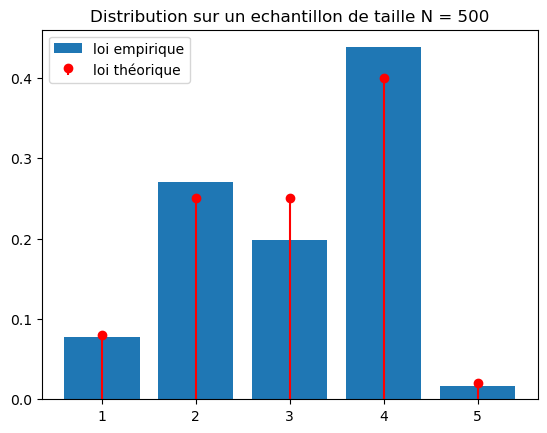

In [12]:
# on utilise l'option minlength=6' pour etre sûr que le vecteur
# retourné est de taille 6 même si l'échantillon ne contient pas 
# la valeur 5.
distrib = np.bincount(echantillon, minlength=6)

# on n'a pas besoin du premier indice car la loi a son 
# support qui commence à 1. 
distrib = distrib[1:]

# la méthode bar est bien adapté pour un histogramme.
plt.bar(espace_etat, distrib/N, label="loi empirique")

# la méthode stem() pour dessiner des sucettes. 
# ATTENTION: ajouter l'option "use_line_collection=True" 
# pour les vieilles versions de matplotlib si vous optenez
# une erreur à l'execution
plt.stem(espace_etat ,probas, linefmt="r", markerfmt="ro", basefmt="None", label="loi théorique")

plt.legend(loc='best')
plt.title(f"Distribution sur un echantillon de taille N = {N}")
plt.show()

**(c)** Relancer les deux cellules précédentes pour $N = 10000$, vérifier que les lois théoriques et expérimentales se rapprochent


**(d)** Relancer les deux cellules précédentes pour $N = 1$. Est-ce que le programme fonctionne encore ? Si ce n'est plus le cas, regardez ce que fait le paramètre optionnel `minlength` dans la méthode `np.bincount`... 

### Lois discrètes classiques

**(e)** Simuler un échantillon de $N=1000$ variables aléatoires de loi de Poisson de paramètre $\lambda = 5$  à l'aide de la méthode `sps.poisson.rvs`. On affichera ensuite deux graphiques côte à côte: 

(i) Sur le graphique de gauche on affichera, comme dans **(b)** la distribution empirique et la distribution théorique. 

(ii) Sur le graphique de droite on affichera la fonction de répartition empirique ainsi que la fonction de répartition théorique. 

*Indications*

- Utiliser la méthodes `sps.poisson.rvs` pour simuler les v.a. et les méthodes `sps.poisson.pmf` et `sps.poisson.cdf` pour calculer les probabilités théorique ainsi que la fonction de répartition. 

- Utiliser la fonction `np.arange` pour créer un tableau d'entiers consécutifs. 

- Utiliser la fonction `np.cumsum` pour calculer la fonction de répartition empirique à partir de la distribution empirique.

- Utiliser `plt.subplot` pour créer/sélectionner des sous-figures côte à côte. 

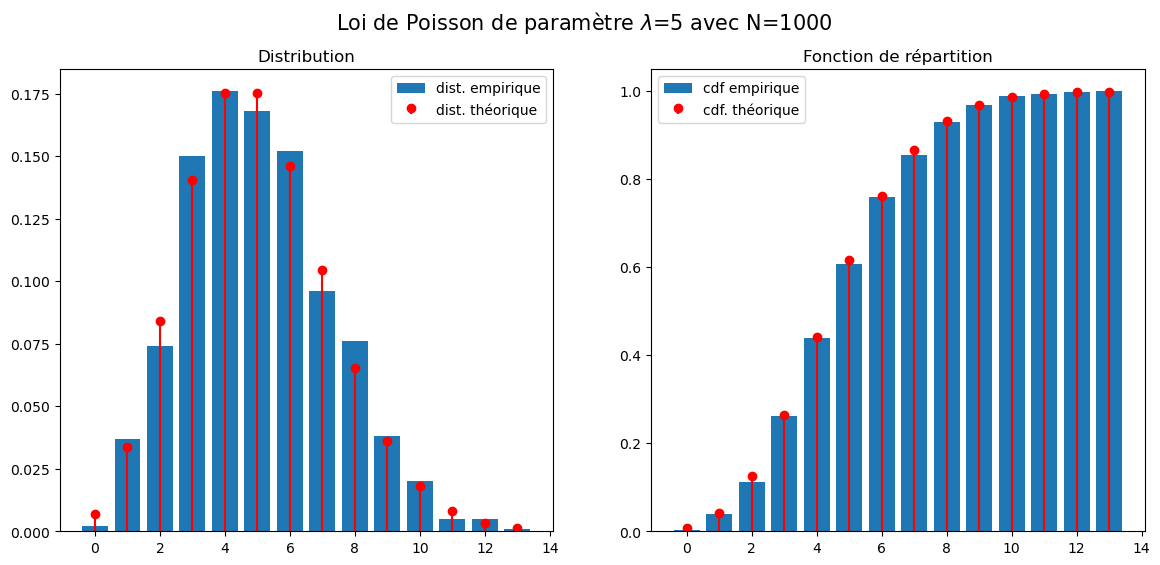

In [13]:
### PARTIE SIMULATION

N = int(1e3)    # erreur classique: sans le int(), 1e6 est un flottant et le programme plante !
l=5             # attention lambda est un mot reservé en python. Utilisons donc 'l'

# on cree l'échantillon de N variables aléatoires Poisson(l)
echantillon = sps.poisson.rvs(mu=l, size=N)

# on trie pour obtenir la distribution empirique
distrib = np.bincount(echantillon)

# calcul la fonction de repartition empirique
repart = np.cumsum(distrib)

# on cree le tableau [0,1,..., max(echantillon)]
# qui servira pour les abscisses dans les graphiques 
X = np.arange(len(distrib))  # np.arange(np.max(echantillon) + 1) marche aussi. 


### AFFICHAGE

# on choisit une figure pas trop petite et assez large pour mettre deux sous-figures a coté. 
plt.figure(figsize = (14, 6))

# titre principal de la figure
plt.suptitle(f"Loi de Poisson de paramètre $\lambda$={l} avec N={N}", fontsize=15)

# FIGURE DE GAUCHE

# on partitionne la figure en (1,2) i.e. une ligne, 2 colonnes
# et on selectionne la premiere sous-figure (donc celle de droite)
# comme figure courante. 
plt.subplot(1,2,1)

# on donne un sous-titre à cette sous-figure
plt.title("Distribution")

# affiche la distribution empirique
plt.bar(X, distrib / N, label="dist. empirique") # penser à diviser par N pour normaliser

# affiche la distribution théorique avec sps.poisson.pmf()
# ajouter l'option "use_line_collection=True" pour les vieilles versions de matplotlib
plt.stem(X, sps.poisson.pmf(X, mu=l), linefmt="r", markerfmt="ro", basefmt="None", label="dist. théorique")

plt.legend(loc='best')

# FIGURE DE DROITE

# on selectionne maintenant la sous-figure de droite 
plt.subplot(1,2,2)

# on lui donne un titre
plt.title("Fonction de répartition")

# affiche la fonction de repartition empirique
plt.bar(X, repart / N, label="cdf empirique") # penser à diviser par N pour normaliser

# affiche la fct de répartition théorique avec sps.poisson.cdf()
# ajouter l'option "use_line_collection=True" pour les vieilles versions de matplotlib
plt.stem(X, sps.poisson.cdf(X, mu=l), linefmt="r", markerfmt="ro", basefmt="None", label="cdf. théorique")

plt.legend(loc='best')

# et finalement on affiche la figure
plt.show()

**(d)** Reprendre le code précédent pour afficher la même graphique mais cette fois avec la loi binomiale $B(30, 0.7)$ (chercher dans la documentation la bonne méthode de sps à utiliser).

***
## 3. Simulations de lois continues

**(a)** Ecrire une fonction qui prend en entrée deux entiers `N,k` et qui renvoie un tableau numpy contenant un échantillon de $N$ v.a. distribuées comme la somme de $k$ v.a indépendentes de loi uniforme sur $[0,1/k]$. 


*Indication:* On tirera toutes les variables aléatoires en une seule fois à l'aide de la commande `npr.rand` afin de générer un tableau de taille $(N,k)$ de v.a. uniformes dans $[0,1/k]$ puis on utilisera la méthode `np.sum` pour additionner les colonnes emsemble (c.f. l'argument optionnel `axis`).

In [14]:
def simulSommeUnif(N, k):
    """     
    Cette méthode renvoie un échantillon de N v.a. distribuées 
    comme la somme de k v.a. de loi uniforme sur [0,1/k]. 
    """
    
    N = int(N) # juste au cas où l'on passe des flottants en paramètres
    k = int(k) # au lieu d'entiers...
    
     # on tire une tableau de taille (N,k) de v.a.  uniformes sur [0,1/k[
    echUnif = npr.rand(N,k) / k  # la division est vectorielle, composante par composante

    # on additionne les lignes ensembles
    echSomme = np.sum(echUnif, axis=1)
    return echSomme

# testons et affichons le tableau pour N=10, k=3
print(simulSommeUnif(10,3))

[0.53904838 0.40524398 0.5542501  0.68776431 0.85954286 0.700204
 0.38091397 0.16721689 0.49535943 0.20259398]


**(b)** Lorsque `k=2`, la densité $f_2$ de la somme de deux v.a. indépendente de loi uniformes sur $[0,1/2]$ est donnée par
$$
f_2(x) = 
\begin{cases}
4 x & \hbox{ si } 0 \leq x \leq 1/2\\
4(1 - x) & \hbox{ si } 1/2 < x \leq 1\\
\end{cases}
$$
Ecrire une fonction qui prend en argument un tableau numpy `x` de flottants et qui renvoie un tableau de même dimension `y` avec $y[i] = f_2(x[i])$ pour tout $i$.

*Indications:* 
- Ne pas utiliser de structure conditonnelle `if` mais uniquement des opérations vectorielles `numpy`. 
- Si x est un tableau numpy, `x > c` renvoie un tableau de booléens de même taille que `x` où sont mis à `True` les indices qui vérifient la condition. 
- Les booléens `False` et `True` sont convertis en $0$ et $1$ lors de calculs numériques.

In [15]:
def f_2(x):
    # on utilise des opérations numpy
    # rappel: False et True sont convertis en 0 et 1 lors de calculs numériques. 
    return 4 * x * ((x >= 0) & (x <= 0.5))  +  4 * (1-x) * ((x > 0.5) & (x <= 1))

# testons... doit renvoyer [0. , 0.8, 2. , 1.2, 0. ]
f_2(np.array([-1, 0.2, 0.5, 0.7, 2]))

array([0. , 0.8, 2. , 1.2, 0. ])

**(c)** Utiliser la fonction précédente `simulSommeUnif(N, k)` pour créer un échantillon avec $N=100000$ et $k=2$. Afficher sur un même graphique:
1. l'histogramme de la distribution empirique de l'échantillon à l'aide de la commande `plt.hist`
2. la densité théorique $f_2$ (calculée grace à la fonction définie précédement) à l'aide de `plt.plot`
3. une ligne verticale pour signifier la moyenne empirique de l'échantillon à l'aide de `plt.vlines`


*Indications:*

- On fera attention à bien choisir le nombre de colonnes dans l'histogramme avec le paramètre `bins`: en règle générale, on  choisit un nombre de corbeilles a peu près équivalent à  la racine cubique de la taille de l'échantillon (voir aussi l'option `'auto'` pour les plus fainéants). Ne pas oublier non plus le paramètre `density=True` pour normaliser correctement.

- On utilisera `np.linspace` pour discrétiser le segment $[0,1]$ et calculer ensuite la valeur de $f_2$ en ces points.

- La moyenne des valeurs d'un tableau numpy se calcule simplement avec `np.mean`.

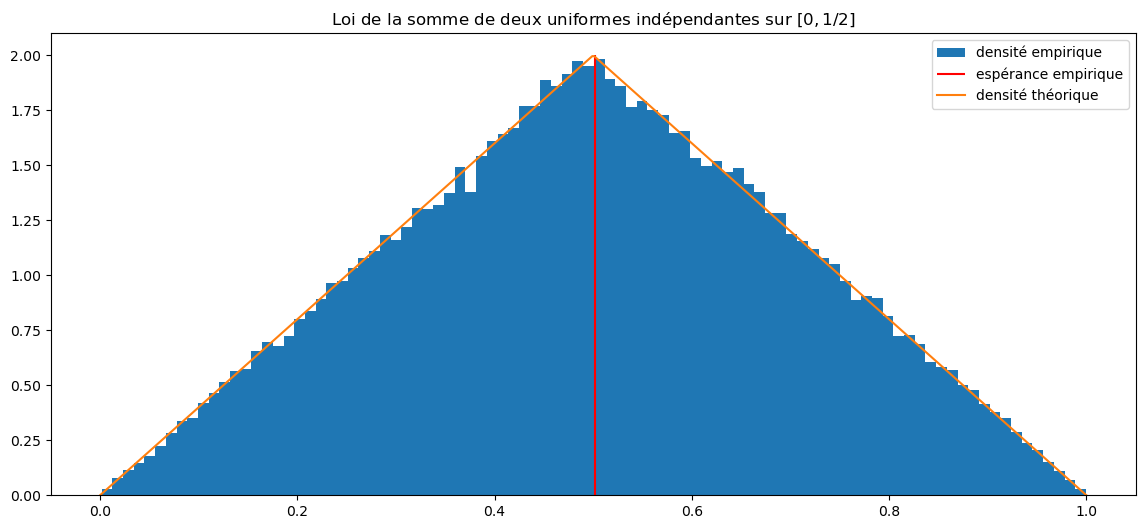

In [16]:
N = 100000
k = 2

plt.figure(figsize=(14,6))
### AFFICHAGE DE L'HISTOGRAMME DE LA DENSITE EMPIRIQUE

echSomme = simulSommeUnif(N, 2)

# le nombre de barres de l'histogramme: 2N^(1/3) est en général un bon choix. 
nb_bins = 2 * int(N**(1./3.)) 

# affiche la densité empirique. On normalise avec `density=True`
# on aurait aussi pu prendre bins='auto'
plt.hist(echSomme, bins=nb_bins, density=True, label="densité empirique")  

### AFFICHAGE DE LA MOYENNE

m = np.mean(echSomme) # c'est pas difficile !
plt.vlines(m, 0, 2, color="red", label="espérance empirique")


### AFFICHAGE DE LA DENSITE THEORIQUE

X = np.linspace(0.0,1.0, 500) # on discrétise l'intervalle [0,1] en 500 points
    
fX = f_2(X) # puis on calcul f_2 sur ces valeurs

plt.plot(X, fX, label="densité théorique")


### COSMETIQUE...

plt.title(f"Loi de la somme de deux uniformes indépendantes sur $[0,1/2]$")
plt.legend(loc="best")
plt.show()

**(d)** Afficher sur un même graphique les fonctions de répartition empiriques pour des échantillons obtenus avec `simulSommeUnif(N, k)` en fixant $N = 100$ et en faisant varier $k$ dans $[1,2,5,10,100,10000]$

*Indications*
- La fonction de répartition empirique $F$ de l'échantillon $(X_1,..X_N)$ est définie par:
$$
F(x) = \frac{1}{n}\sum_{i=1}^n \mathbf{1}_{\{X_i \leq x\} }
$$
- Pour afficher cette fonction de répartition, on commencera par trier l'échantillon avec la méthode `sort` puis on utilisera la commande `plt.step` pour afficher le tableau $[0,1/N, 2/N, \ldots]$ en fonction de l'echantillon trié (attention, ici c'est dans le sens contraire à celui habituel: l'échantillon trié est en abcisse). 
- Faire attention aux bornes dans `plt.step`: regarder ce que fait l'option `where`.

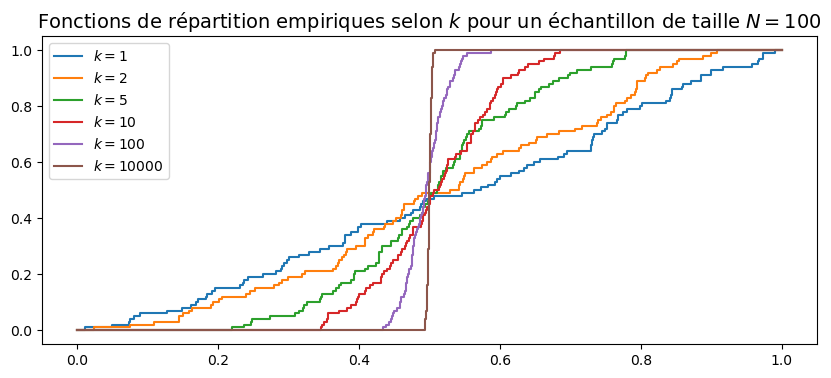

In [17]:
N = 100
liste_k = [1,2,5,10,100,10000]

plt.figure(figsize =(10,4)) 

# on cree le tableau de taille N+2: [0, 1/N , 2/N , ... , (N-1)/N , N / N, 1.0]
# on repète 1.0 à la fin pour des questions d'affichage
steps = np.arange(N+2)/N
steps[-1] = 1.0

for k in liste_k:
    ech = simulSommeUnif(N, k) # on simule l'échantillon
    ech = np.append(ech,[0.0,1.0]) # on rajoute les bornes 0.0 et 1.0
    rep = np.sort(ech) # on trie tout ca.
    plt.step(rep, steps, where='post', label=f"$k={k}$") # on affiche avec step. 

plt.title(f"Fonctions de répartition empiriques selon $k$ pour un échantillon de taille $N={N}$", fontsize=14)
plt.legend(loc="best")
plt.show()

**(e)** Que remarquez-vous sur le graphique précédent. Comment l'expliquez-vous ? 

REPONSE: lorsque $k$ tend vers l'infini, la fonction de répartition empirique tend vers l'indicatrice $\mathbb{1}_{\{x \geq 0.5\}}$ d'après la loi des grand nombres.

***
## 4. TCL et invervalles de confiance asymptotiques.

### Le théorème de la limite centrale. 

On rappelle que si $(X_i)$ est une suite de variables aléatoires indépendantes identiquement distribuées et de carré intégrable, d'espérance et écart-type communs notés respectivement $m$ et $\sigma$, alors en définissant

$$\bar X_k = \frac 1 k (X_1 + \cdots + X_k)$$

la suite

$$\sqrt{k}(\bar X_k - m) / \sigma$$


converge en loi vers la loi gaussienne standard $\mathcal{N}(0,1)$ lorsque $k$ tend vers l'infini.

**(a)** Illustrer ce théorème lorsque les $(X_i)$ suivent la loi lognormale de densité
$$
f(x) = \frac{1}{x\sqrt{2\pi}}\exp\left(\frac{\log^2(x)}{2}\right) \quad\hbox{ pour } x \in ]0,+\infty[
$$


Pour cela on simulera $N$ réalisations indépendantes de $\bar X_k$ puis on affichera sur un même graphique la densité empirique de $\sqrt{k}(\bar X_k - m) / \sigma$ ainsi que la densité théorique de la loi $\mathcal{N}(0,1)$.
  
  
On prendra $N = 10000$, $k = 1000$.

*Indications:*
- On cherchera dans la documentation de `scipy.stats` comment simuler des variables de loi lognormale. On utilisera aussi les méthodes disponibles dans `scipy.stats` pour obtenir les valeurs numériques de la moyenne et de la variance de cette loi. 
- On tirera toutes les v.a. nécessaires pour la simulation en une seule fois dans un tableau bi-dimensionnel de taille $N *k$.
- On utilisera `np.mean()` (avec l'option `axis`) pour calculer le tableau des $\bar X_k$.  

Esperance de la loi: 1.64872e+00
Ecart type de la loi: 2.16120e+00


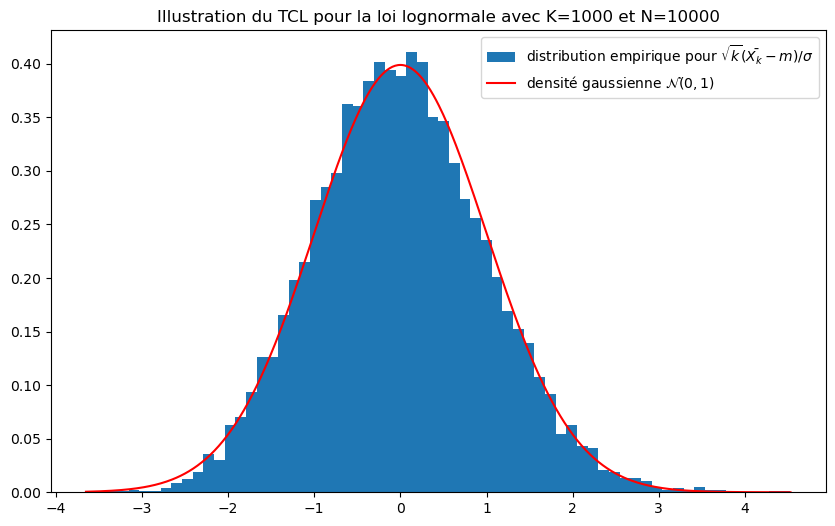

In [18]:
N = 10000 # nombre de simulations
K = 1000  # rang de la somme pour chaque simulation.

# La loi de lognormale, c'est tout bêtement "sps.lognorm" :-)
# ici le paramètre s vaut 1
lnl = sps.lognorm(1) # on freeze la distribution lognormale avec s=1


m = lnl.mean() # espérance
sigma = lnl.std()  # ecart type

print(f"Esperance de la loi: {m:.5e}")
print(f"Ecart type de la loi: {sigma:.5e}")

sample = lnl.rvs(size=(N,K)) # on tire NxK v.a. de loi lognormale
XbarK = np.mean(sample, axis=1) # on calcule la moyenne selon l'axe 1: on recupère le vecteur des moyennes empiriques
G = np.sqrt(K)*(XbarK - m)/sigma # centrage et scaling. 

plt.figure(figsize=(10,6))
plt.hist(G, density=True, bins='auto',
         label=r"distribution empirique pour $\sqrt{k}(\bar{X_k} - m)/\sigma$") # exemple de LaTeX: attention à utiliser une raw string

X = np.linspace(np.min(G), np.max(G), 500) # discrétise l'intervalle d'affichage
plt.plot(X, sps.norm.pdf(X), "r", label="densité gaussienne $\mathcal{N}(0,1)$") # trace la densité gaussienne. 
plt.legend(loc='best')
plt.title(f"Illustration du TCL pour la loi lognormale avec K={K} et N={N}")
plt.show()

### Calcul d'intégrale et intervalle de confiance asymptotique. 

**Explication** La loi des grands nombres donne une manière de calculer des intégrales. Soit $f :[0,1]\to \mathbb{R}$ une fonction continue et $I = \int_{0}^1 f(x) dx$. Soit $(U_n)$ une suite de v.a. aléatoires uniformes sur $[0,1]$. D'après la loi des grands nombres: 
$$\label{defIn}\tag{1}
I_n =\frac{1}{n}\sum_{i=1}^n f(U_n) \underset{n\to\infty}{\longrightarrow} E[f(U)] = I
$$
La quantité $I_n$ est un estimateur consistant et sans biais de $I$. On veut estimer l'erreur commise. Pour cela on utilise un *intervalle de confiance*. 


Plus précisément, le théorème central limite stipule que, pour $n$ assez grand, $I_n - I$ est approximativement distribuée comme une variable aléatoire normale standard multipliée par $\frac \sigma {\sqrt{n}}$ avec $\sigma=\sqrt{\hbox{var}(f(U))}$. Ainsi, puisque 
$$\nonumber
  \mathbb P (-1.96 \leq \mathcal{N}(0,1) \leq 1.96) \approx 0.95,
$$
on sait que pour $n$ assez grand, on a approximativement
$$\nonumber
  \mathbb P \Big( I_n - \frac{1.96 \, \sigma}{\sqrt{n}}
  \leq I \leq
  I_n + \frac{1.96 \, \sigma}{\sqrt{n}} \Big) \approx 0.95.
$$

On dit alors que l'intervalle

$$\nonumber
  \Bigl[ I_n - \frac{1.96 \, \sigma}{\sqrt{n}}, \,
  I_n + \frac{1.96 \, \sigma}{\sqrt{n}} \Bigr]
$$

est un intervalle de confiance asymptotique au niveau 95% pour $I$: précisément, 
avec une probabilité asymptotiquement égale à 0.95, la quantité $I$ sera bien
entre les bornes (aléatoires) de cet intervalle.

Bien sûr, si on ne connait pas $I$, on ne connait  a priori pas non plus l'écart type $\sigma$. Toutefois, on peut le remplacer par l'estimateur:

$$\label{defSn}\tag{2}
\sigma_n = \Big( \frac 1 n \sum_{i=1}^n (f(U_i) - I_n)^2\Big)^{1/2}. 
$$

En utilisant le lemme de Slutsky, on obtient, asymptotiquement, l'intervalle de confiance:
$$\nonumber
\Bigl[ I_n - \frac{1.96 \, \sigma_n}{\sqrt{n}}, \, I_n + \frac{1.96 \, \sigma_n}{\sqrt{n}} \Bigr]
$$

**TL,DR:** Pour résumer, il suffit de calculer $I_n$ par \ref{defIn} et $\sigma_n$ par \ref{defSn} pour estimer l'intégrale $I$ et obtenir en même temps un intervalle de confiance à 95% de cette estimation. 


**(b)** On considère la fonction $f(x) = \frac{e^x}{\sqrt{x+1}}$. Estimer la valeur de $I$ et donner un intervalle de confiance à 95% de diamètre au plus $0.001$. Vérifiez votre résultat sachant que $I \approx 1.384103...$.

*Indications*
- Commencer par simuler un nombre fixé $N=1000$ (par exemple) de v.a. et regarder le diamètre de l'intervalle de confiance obtenu. Recommencer en augmentant $N$ progressivement jusqu'à obtenir un interval de confiance de diamètre plus petit que $0.001$.
- $I_n$ se calcule directement avec `np.mean()`.
- $\sigma_n$ se calcul directement avec `np.std()`.

In [19]:
def f(x):
    """Fonction dont on veux calculer l'intégrale"""
    return np.exp(x) /np.sqrt(x + 1)

diam = 0.001 # diamètre demandé

N = 1000  # nb de v.a., à ajuster pour avoir un diametre <= 0.01

X = f(np.random.rand(N)) # genère N  v.a. de loi f(U)

sn = np.std(X)  # estimateur de l'écart type
while 2*1.96*sn/np.sqrt(N) > diam:
    # le diametre de l'intervalle de confiance est trop grand. 
    # donc on doit donc simuler davantage de v.a.
    X = np.append(X,f(np.random.rand(N)))
    N *= 2; 
    sn = np.std(X)  # recalcule l'ecart-type empirique
     
I = np.mean(X)
r = 1.96*sn/np.sqrt(N)
print(f"nombre de variables simulées: {N}")    
print(f"valeur estimée de l'intégrale: {I:.4}")    
print(f"intervalle de confiance à 95%: [{I -r}, {I+r}]")   

#testons...
if (I-r) <= 1.384103 <= (I+r):
    print("Estimation correcte !")
else:
    print("pas de chance...")

nombre de variables simulées: 2048000
valeur estimée de l'intégrale: 1.384
intervalle de confiance à 95%: [1.3837569037299724, 1.3844841777881587]
Estimation correcte !


***
## 5. [Facultatif] Méthodes de génération de variables aléatoires. 


Dans certains cas, on désire simuler des variables aléatoires dont la loi n'est pas classique (et donc pour laquelle il n'y a pas de fonction `scipy.stats` disponible). Plusieurs méthodes sont possibles: 


### Simulation par inversion de la fonction de répartition

Soit $F(x) = \mathbb{P}(X \leq x)$ la fonction de répartition de la loi que l'on veut simuler. On définit l'inverse généralisée $F^{-1}$ de $F$ par

$$
F^{-1}(y) = \inf(x\in \mathbb{R} , F(x) \geq y) \quad \hbox{ pour } y\in ]0,1[
$$

Soit $U$ une variable aléatoire de loi uniforme sur $]0,1[$. Alors $F^{-1}(U)$ a même loi que $X$. Ceci donne donc une méthode simple de simulation **lorsque l'inverse de la fonction de répartition est calculable explicitement**.

**(a)** On considère une loi de **densité** sur $[0,1]$ donnée par
$$
\nonumber
f(x) = \frac{3\pi x^2}{2}\cos\left( \frac{\pi x^3}{2}\right) \mathbb{1}_{\{ x \in ]0,1[\} }
$$
Simuler $N= 10000$ variables aléatoires de densité $f$ et afficher l'histogramme de la distribution empirique que l'on comparera avec la densité théorique.

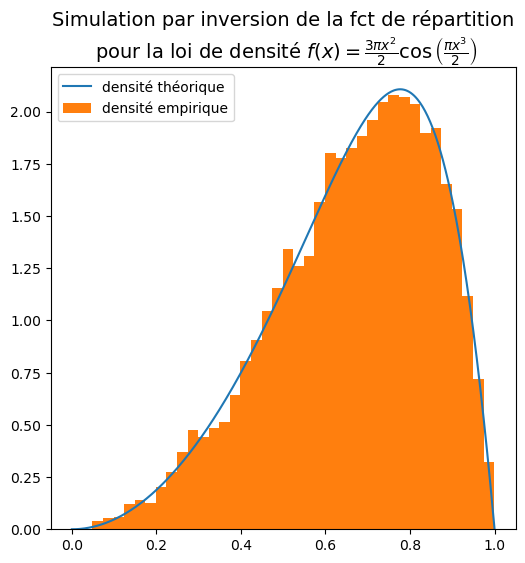

In [20]:
# la fonction de densité
def f(x):
    return 3 * np.pi * x**2 / 2 * np.cos(np.pi * x**3 / 2)

# La fonction de répartition est F(x) = sin(pi*x^3 / 2)
# l'inverse est donc F^-1(x) = (2 arcsin(y) / pi)^(1/3)
def invF(x): 
    return (2 * np.arcsin(x) / np.pi)**(1/3.0)

N= 10000

# on simule des uniforme et on applique F^-1
ech = invF(npr.rand(N)) # 

# on affiche le résultat
x = np.linspace(0,1,500)
plt.figure(figsize=(6,6))
plt.plot(x,f(x), label="densité théorique")
plt.hist(ech, bins='auto', density = True, label="densité empirique")
plt.title("Simulation par inversion de la fct de répartition\n pour la loi de densité $f(x) = \\frac{3\\pi x^2}{2}\\cos\\left( \\frac{\\pi x^3}{2}\\right)$", fontsize=14)
plt.legend(loc='best')
plt.show()


### Simulation par la méthode du rejet

La méthode du rejet permet de simuler une variable aléatoire dont on sait calculer la densité à un facteur multiplicatif près en utilisant uniquement des variables aléatoires uniformes. Décrivons ici la méthode lorsque la variable aléatoire a pour densité $f$, à support compact dans un intervalle $[a,b]$ et on suppose de plus $0 \leq f \leq M$:  

- Soit $(U_n, V_n)_{n\geq 1}$ une suite de couples indépendants de variables aléatoires telles que pour tout $n$, $U_n, V_n$ sont indépendantes et de lois uniformes sur, respectivement, $[a,b]$ et $[0,M]$. On définit l'indice $\tau$:
$$\tau= \min\{n\geq 1 : \, V_n\leq f(U_n)\},$$
Il est facile de vérifier que $\tau$ est bien défini presque surement. La v.a. $U_{\tau}$ suit alors la loi de densité $f$. 

On remarquera que l'algorithme de simulation est d'autant plus efficace que l'on choisit $M$ petit (idéalement, prendre $M = ||f||_\infty$ si on a accès à cette valeur).

**(b)** Appliquer ce résultat pour simuler des v.a. de *loi de Wigner* (aussi appelée loi du demi-cercle) dont la densité est donnée par:
$$
\frac 1{2\pi} \sqrt{4 - x^2}\mathbf{1}_{x\in]-2,2[}
$$

On réalisera `N`=1000000 simulations puis on affichera sur le même graphique la densité empirique obtenue ainsi que la densité théorique écrite ci-dessus.

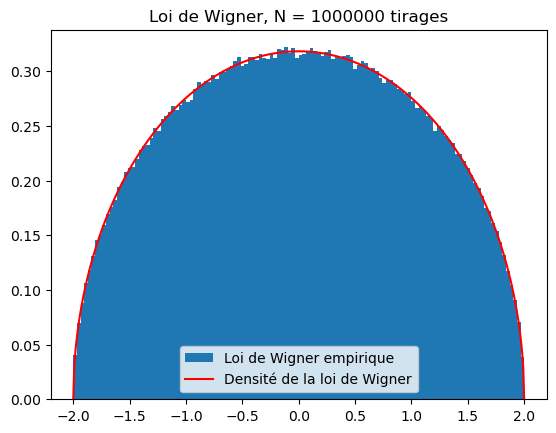

In [21]:
################
### SOLUTION ###
################

def wigner_density(x):
    """La densité de la loi de Wigner"""
    return np.sqrt(4 - x**2)/(2*np.pi)

M = 1./np.pi  # borne optimale pour le rejet

    
def gener_Wigner(N):
    """renvoie un tableau avec N v.a. de loi de Wigner
       Version simple à comprendre (mais moins rapide)"""
    W = np.zeros(N) # on va mettre les variables dans ce tableau.         
    n = 0 # nombre de variables générées
    while n < N:
        u = 4. * npr.rand() - 2.    # v.a. uniforme dans [-2,2[
        v = M  * npr.rand()         # v.a. uniforme dans [0,M[
        if v < wigner_density(u):   # test du rejet
            W[n] = u                # on accepte 
            n += 1                  # et on incremente le compteur
    return W # renvoi le tableau.
    

def gener_Wigner_fast(N):
    """renvoie un tableau avec N v.a. de loi de Wigner
       Version numpy plus rapide"""    
    W = np.zeros(N) # on va mettre les variables dans ce tableau.         
    n = 0 # nombre de variables générées    
    while n < N:
        U,V = np.random.rand(2, N) # simule simultanément 2N v.a uniformes sur [0,1[ 
        U = 4*U - 2 # maintenant, les U sont unif sur [-2, 2[
        V *= M # et les V sont unif sur [0,M[
        R = U[wigner_density(U) > V] # rejete en bloc: bien observer l'utilisation de l'indexage booleen !
        k = min(len(R), N - n) # on ajoute tous les éléments de R sauf si ca dépasse la taille de W. 
        W[n:n+k] = R[:k] # copie des éléments de R dans W, pas d'allocation mémoire à effectuer
        n += k
    return W
    
N = 1000000 # nombre de v.a. à simuler
#W = gener_Wigner(N) # réalise le sampling avec la méthode lente
W = gener_Wigner_fast(N) # réalise le sampling avec la methode rapide

# affichage 
plt.hist(W, density=True, bins='auto', label="Loi de Wigner empirique")
X = np.linspace(-2., 2., 500)
d_X = wigner_density(X)
plt.plot(X, d_X, "r", label="Densité de la loi de Wigner", linewidth=1.5)
plt.legend(loc="lower center")
plt.title(f"Loi de Wigner, N = {N} tirages")
plt.show()

In [22]:
#on peut vérifier que la seconde méthode est bien plus rapide:
N = 100000

print(f"Temps nécessaire pour generer {N} v.a. (méthode lente)")
%timeit gener_Wigner(N)

print(f"Temps nécessaire pour generer {N} v.a. (méthode rapide)")
%timeit gener_Wigner_fast(N)

Temps nécessaire pour generer 100000 v.a. (méthode lente)
325 ms ± 5.01 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Temps nécessaire pour generer 100000 v.a. (méthode rapide)
5.91 ms ± 48.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


***

## 6. [HORS TP] Quelques trucs supplémentaires utiles...

Vous trouverez ci-dessous quelques conseils de programmation ainsi que des exemples et des liens vers la documentation qui pourra éventuellement vous servir lors de la rédaction de vos projets Python. 

### $\bullet$ Faire des expériences aléatoires... mais reproductibles. 

Dans certaines situations, il est utile de fixer la graine du générateur aléatoire de manière à obtenir toujours la même suite de nombres aléatoires. Ceci est utile pour débugger un programme ou pour comparer différentes fonctions sur la même suite de données. 

Pour fixer la graine, utiliser la commande `npr.seed`

In [23]:
for i in range(3):
    #reinitialise la graine
    npr.seed(1234)
    
    #tire 5 v.a. normales, mais toujours les mêmes !
    print(npr.randn(5))   

[ 0.47143516 -1.19097569  1.43270697 -0.3126519  -0.72058873]
[ 0.47143516 -1.19097569  1.43270697 -0.3126519  -0.72058873]
[ 0.47143516 -1.19097569  1.43270697 -0.3126519  -0.72058873]


### $\bullet$ Mesurer le temps d'exécution d'un programme

On peut mesurer le temps d'exécution d'une fonction à l'aide de la commande magique `%timeit`. 

In [24]:
x = npr.randn(1000,1000)

# temps de calcul pour trouver les valeurs propres d'une matrice 1000x1000 à entrées N(0,1)
%timeit np.linalg.eig(x)

1.09 s ± 68.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


voir aussi le module Python [timeit](https://docs.python.org/3/library/timeit.html) (et éventuellement aussi [time](https://docs.python.org/3/library/time.html)) pour plus d'informations.

### $\bullet$ Programmation matricielle ou boucles ? 

Lorsque c'est possible, il est préférable d'utiliser des tableaux et des méthodes numpy plutôt que des listes Python et des boucles `for` ou `while`. Le gain de temps peut être considérable.

Voici un exemple simple où l'on calcule les premiers pas $(S_0, S_1, ..., S_N)$ d'une marche aléatoire définie par $S_n = \sum_{i=1}^n X_i$ ou les $(X_i)$ sont i.i.d. de loi $\mathcal{N}(0,1)$.

In [25]:
# calcul de la marche à l'aide d'une liste python et d'une boucle for
# c'est simple, cela fonctionne, mais on peut faire mieux...
def RW_python(N):
    '''
    Renvoi une liste python contenant [S_0, S_1, ... S_n]
    '''
    S = [0]
    for _ in range(N):
        S.append(S[-1] + npr.randn())
    return S

# ... mais pas comme cela !
# La même boucle avec un tableau numpy: c'est bien pire !
# La concaténation de tableau numpy est à proscrire car le tableau 
# doit être réalloué puis recopié à chaque itération.
def RW_hideous_awful_very_bad_numpy(N):
    '''
    Renvoi un tableau numpy contenant [S_0, S_1, ... S_n]
    *** IMPLEMENTATION A EVITER A TOUT PRIX ***
    '''
    S = np.array([0])
    for _ in range(N):
        S = np.append(S, S[-1] + npr.randn())
    return S


# Version numpy correcte: le tableau est alloué statiquement une seule 
# fois et les opérations sont vectorialisées.
def RW_numpy(N):
    '''
    Renvoi un tableau numpy contenant [S_0, S_1, ... S_n]
    BONNE VERSION
    '''    
    S = npr.randn(N+1)
    S[0] = 0
    return np.cumsum(S)

Comparons les temps d'exécutions de ces fonctions:

In [26]:
N = 10000

%timeit RW_python(N)

%timeit RW_hideous_awful_very_bad_numpy(N)

%timeit RW_numpy(N)

5.55 ms ± 44.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
74.8 ms ± 637 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
346 µs ± 22.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Ici, le gain de temps est d'ordre 20x (sur ma machine) entre la version python et la version numpy rapide. Malheureusement, certains problèmes (comme par exemple la simulation de chaînes de Markov) ne se prêtent pas bien à la parallélisation numpy et il faut donc parfois quand même utiliser les boucles `for` et `while`

### $\bullet$ Utiliser correctement le slicing et l'indexage avancé des tableaux

- Les *compréhensions de liste* permettent de réaliser facilement le fitrage d'éléments dans une liste python. *L'indexage booléen* permet de faire de même avec les tableaux numpy (utile par exemple  dans l'implémentation de la méthode du rejet). L'utilisation de cet indexage remplace une boucle `for` tout en rendant le code plus lisible et plus rapide:

In [27]:
#version python
L = list(range(10))  # crée la liste python [0,1,2,...9]
L2 = [np.sin(x) for x in L if np.cos(x) > 0] # L2 contient les sinus des éléments dont le cosinus est positif...
print(L2)

#version numpy
X = np.arange(10) # crée le tableau numpy [0,1,2,...9]
X2 = np.sin(X[np.cos(X) > 0]) # pareil, X2 contient les sinus des éléments dont le cosinus est positif...
print(X2)

[0.0, 0.8414709848078965, -0.9589242746631385, -0.27941549819892586, 0.6569865987187891]
[ 0.          0.84147098 -0.95892427 -0.2794155   0.6569866 ]


- Le *slicing* numpy permet de travailler seulement sur une partie d'un tableau. **Attention:** Slicer un tableau numpy renvoie une *vue* sur le tableau (qui partage donc ses données avec le tableau initial) alors que slicer une liste Python renvoie une *copie* (indépendente de la liste mère) !

In [28]:
#version python
L = [1,2,3,4,5] # liste python 
L2 = L[::-2]    # [5,3,1] : la liste à l'envers en sautant un élément sur deux.
L2[0] = 0       # ceci ne change pas L car L2 est une copie 
print(L)

#version python
X = np.array([1,2,3,4,5])# tableau numpy
X2 = X[::-2]             # [5,3,1] : la liste à l'envers en sautant un élément sur deux.
X2[0] = 0                # ATTENTION: modifier X2 modifie X en même temps !
print(X)

[1, 2, 3, 4, 5]
[1 2 3 4 0]


- L'*indexage avancé* d'un tableau numpy permet d'extraire d'un tableau un ensemble d'éléments à partir de la liste de leurs indices. Ceci peut également être utile pour réaliser une 'lookup table' 

     Exemple (un peu idiot). Soit $a_0,\ldots a_4$ des réels fixés. On veut simuler la loi de 
$\prod_{i=1}^{10} a_{X_i}$ ou les $X_i$ sont des v.a. i.i.d de loi uniforme dans $\{0,\ldots,4\}$.

In [29]:
a = np.array([1.1, 3.7, 6, 4, 1])  # paramètres [a_0,..,a_4]

X = npr.choice(5, size=10) # tirage de 10 uniformes sur 0,..,4

np.prod(a[X]) # extraction par indexage avancé puis multiplication des éléments extraits.  

14065.920000000002

Pour plus d'information à propos de l'indexage des tableaux numpy, consulter la [documentation](https://numpy.org/doc/stable/reference/arrays.indexing.html).

### $\bullet$ Afficher un tableau numpy sous forme d'image. 

Le méthode `matshow` de maptplotlib (ou encore `imshow`) permet de représenter un tableau numpy sous forme d'une image ce qui peut être commode pour visualiser de grands tableaux.

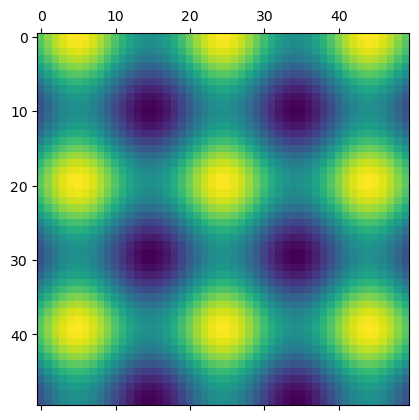

In [30]:
# un tableau un peu etrange...
x = np.linspace(0, 5*np.pi, 50)
M = np.cos(x[:, np.newaxis]) + np.sin(x[np.newaxis, :])

# affichons pour voir sa tête...
plt.matshow(M)

On peut également enregistrer le tableau sous forme d'une image:

In [31]:
import matplotlib

# on sauve le tableau dans le fichier "test"
# au format png dans le répéertoire courant.
matplotlib.image.imsave("test.png",M)

ou encore charger une image sous forme d'un tableau numpy:

(50, 50)
(50, 50, 4)


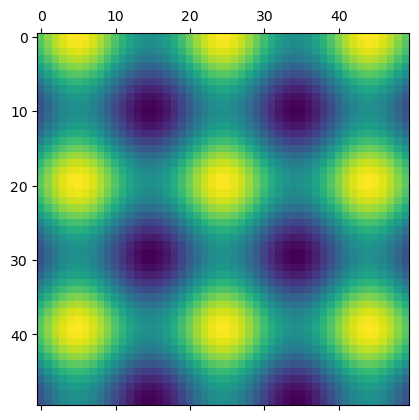

In [32]:
# load l'image dans un tableau 
M2 = matplotlib.image.imread("test.png") 

# à première vu, ca ressemble au tableau de départ...
plt.matshow(M2)

# ...mais attention, M2 n'est pas un tableau (50,50) mais
# un tableau de 'image' de taille (50,50,4) avec 4 composantes
# de couleurs RGBA. 
# On ne peut pas 'sauver' un tableau sous forme d'image pour le 
# réutiliser plus tard (voir plus bas pour cela)...
print(M.shape)
print(M2.shape)

Pour davantage de méthodes concernants la création et la manipulation d'images, on poura aller voir le module [Pillow - The Python Imaging Library](https://pillow.readthedocs.io/en/stable/).

### $\bullet$ Affichage de graphiques en 3D

Il est possible de réaliser des affichage de graphique en 3 dimensions à l'aide du sous-module `mplot3D`.

(3000,)


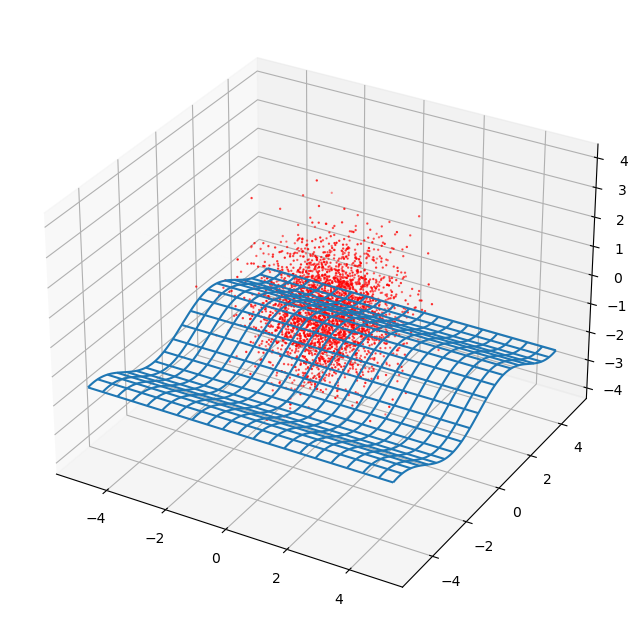

In [33]:
#import du module pour affichage en 3D
from mpl_toolkits.mplot3d import axes3d

# nouvelle figure
plt.figure(figsize=(8,8))

# object de type "axe" en 3D dimension. 
# il faut appeler les méthodes de matplotlib sur ax. 
# pour afficher en 3D dans cette sous-figure.
ax = plt.axes(projection='3d')

# on cree une grille ondulante...
u = np.arange(-5, 5, 0.05)
x, y = np.meshgrid(u, u)
z = 0.5*np.sin(y) - 2
# ...et on l'affiche
ax.plot_wireframe(x, y, z, rstride=10, cstride=10)

#on cree un nuage de points gaussiens...
xx, yy, zz = npr.randn(3,3000)
# ...et on l'affiche
ax.scatter(xx, yy, zz, s=0.5, color='red')

print(xx.shape)
plt.show()

Pour plus d'informations, voir la documentation de [mplot3D](https://matplotlib.org/2.2.2/tutorials/toolkits/mplot3d.html#sphx-glr-tutorials-toolkits-mplot3d-py) ainsi que les [exemples de matplotlib (section 3D plotting)](https://matplotlib.org/2.2.2/gallery/index.html)

### $\bullet$ Charger et sauvegarder des données dans un fichier CSV

Lors de l'utilisation de données réelles, il est utile de savoir importer et sauver des tableaux de données. Un format simple et souvent utilisé est le format [CSV (comma separated values)](https://fr.wikipedia.org/wiki/Comma-separated_values) où chaque ligne du fichier correspondent à une ligne du tableau et ou les entrées d'une ligne sont séparées par des virgules. 

On peut facilement écrire des fichiers CSV avec numpy en utilisant la méthode `np.savetxt` avec l'option `delimiter=','`

In [34]:
# on crée un jeu de données
W = np.vander([1.1, 2, 3, 5], 4) 
print(W)

# sauvons ce tableau dans un fichier CSV appelé "vandermonde.csv"
# dans le répertoire courant, avec avec une entête pour expliquer 
# ce dont il s'agit. 
np.savetxt("vandermonde.csv", W, header="Ceci est une matrice de vandermonde, étonnant non!", delimiter=",")

[[  1.331   1.21    1.1     1.   ]
 [  8.      4.      2.      1.   ]
 [ 27.      9.      3.      1.   ]
 [125.     25.      5.      1.   ]]


De même, on peut charger des fichiers CSV avec la commande `np.loadtext`. On peut aussi utiliser le commande `np.np.genfromtxt` qui propose davantage d'options pour gérer les éventuelles données manquantes dans le fichier. 

In [35]:
# On charge la fichier crée précédement
# on utilise l'option skiprows=1 pour ignorer la première ligne d'entête. 
W2 = np.loadtxt("vandermonde.csv", skiprows=1, delimiter=",")
print(W2)

[[  1.331   1.21    1.1     1.   ]
 [  8.      4.      2.      1.   ]
 [ 27.      9.      3.      1.   ]
 [125.     25.      5.      1.   ]]


L'utilisation des méthode numpy et du format CSV est suffisante lorsque l'on utilise des jeux de données simple. Dans le cas d'une utilisation plus complexe, il faut utiliser la bibliothèque [pandas](https://pandas.pydata.org/docs/user_guide/10min.html#) beaucoup plus puissante mais dont l'utilisation sort du cadre de ce cours. 

***
# FIN DU NOTEBOOK. BON CODE ET BON PROJETS !